## Prerequisites

Run this cell to prepare the environment. This step is obligatory.

In [1]:
!pip install retentioneering

The full text of [Eventstream user guide](https://doc.retentioneering.com/release3/doc/user_guides/eventstream.html) is available on the retentioneering website.

## Eventstream creation

### Default field names

In [2]:
import pandas as pd

df1 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00'],
        ['user_1', 'B', '2023-01-01 00:00:01'],
        ['user_2', 'B', '2023-01-01 00:00:02'],
        ['user_2', 'A', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:04'],
    ],
    columns=['user_id', 'event', 'timestamp']
)

In [3]:
from retentioneering.eventstream import Eventstream

stream1 = Eventstream(df1)

In [4]:
stream1.to_dataframe()

event_id  event_type  event_index       event  \
0  e6c37953-a47c-474d-b2bb-c805b5eadcd4  path_start            0  path_start   
1  e6c37953-a47c-474d-b2bb-c805b5eadcd4         raw            0           A   
2  45fce2bb-536e-4e05-a998-5ceec13fabb8         raw            1           B   
3  45fce2bb-536e-4e05-a998-5ceec13fabb8    path_end            1    path_end   
4  f43a320b-77b3-4973-a809-783f32df1e2f  path_start            2  path_start   
5  f43a320b-77b3-4973-a809-783f32df1e2f         raw            2           B   
6  5beb2751-7ba5-4071-872c-81db191a6fd7         raw            3           A   
7  778efbbd-48e6-40cb-8051-ad68a1d8c7a4         raw            4           A   
8  778efbbd-48e6-40cb-8051-ad68a1d8c7a4    path_end            4    path_end   

            timestamp user_id  
0 2023-01-01 00:00:00  user_1  
1 2023-01-01 00:00:00  user_1  
2 2023-01-01 00:00:01  user_1  
3 2023-01-01 00:00:01  user_1  
4 2023-01-01 00:00:02  user_2  
5 2023-01-01 00:00:02  user_2  
6 2023-01-01 00:00:03  user_2  
7 2023-01-01 00:00:04  user_2  
8 2023-01-01 00:00:04  user_2

### Custom field names

In [5]:
df2 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00'],
        ['user_1', 'B', '2023-01-01 00:00:01'],
        ['user_2', 'B', '2023-01-01 00:00:02'],
        ['user_2', 'A', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:04']
    ],
     columns=['client_id', 'action', 'datetime']
)

raw_data_schema = {
    'user_id': 'client_id',
    'event_name': 'action',
    'event_timestamp': 'datetime'
}

stream2 = Eventstream(df2, raw_data_schema=raw_data_schema)
stream2.to_dataframe().head(3)

event_id  event_type  event_index       event  \
0  e719c52f-5677-49c2-a02d-d3ec7eb376c1  path_start            0  path_start   
1  e719c52f-5677-49c2-a02d-d3ec7eb376c1         raw            0           A   
2  7cfa78bd-37ee-4f0d-9fc9-ffb858fac940         raw            1           B   

            timestamp user_id  
0 2023-01-01 00:00:00  user_1  
1 2023-01-01 00:00:00  user_1  
2 2023-01-01 00:00:01  user_1

In [6]:
df3 = pd.DataFrame(
        [
            ['user_1', 'A', '2023-01-01 00:00:00', 'session_1', 'mobile'],
            ['user_1', 'B', '2023-01-01 00:00:01', 'session_1', 'mobile'],
            ['user_2', 'B', '2023-01-01 00:00:02', 'session_2', 'desktop'],
            ['user_2', 'A', '2023-01-01 00:00:03', 'session_3', 'desktop'],
            ['user_2', 'A', '2023-01-01 00:00:04', 'session_3', 'desktop']
        ],
        columns=['client_id', 'action', 'datetime', 'session', 'device']
    )
raw_data_schema = {
    'user_id': 'client_id',
    'event_name': 'action',
    'event_timestamp': 'datetime',
    'custom_cols': [
        {
            'raw_data_col': 'session',
            'custom_col': 'session_id'
        }
    ]
}

stream3 = Eventstream(df3, raw_data_schema=raw_data_schema)
stream3.to_dataframe().head(3)

event_id  event_type  event_index       event  \
0  091d0318-0c3b-4e91-9d70-f55652717886  path_start            0  path_start   
1  091d0318-0c3b-4e91-9d70-f55652717886         raw            0           A   
2  ceecfa3b-1521-46d3-95b0-4c4b0c074bd4         raw            1           B   

            timestamp user_id session_id  
0 2023-01-01 00:00:00  user_1  session_1  
1 2023-01-01 00:00:00  user_1  session_1  
2 2023-01-01 00:00:01  user_1  session_1

### Eventstream field names

In [7]:
from retentioneering.eventstream import EventstreamSchema

new_eventstream_schema = EventstreamSchema(
    user_id='client_id',
    event_name='action',
    event_timestamp='datetime'
)

stream1_new_schema = Eventstream(df1, schema=new_eventstream_schema)
stream1_new_schema.to_dataframe().head(3)

event_id  event_type  event_index      action  \
0  81d042d4-ae4b-42af-9691-b87b2f2ed489  path_start            0  path_start   
1  81d042d4-ae4b-42af-9691-b87b2f2ed489         raw            0           A   
2  aba7b523-2be6-4b06-8fc5-793e3597c41f         raw            1           B   

             datetime client_id  
0 2023-01-01 00:00:00    user_1  
1 2023-01-01 00:00:00    user_1  
2 2023-01-01 00:00:01    user_1

In [8]:
stream1_new_schema.schema

EventstreamSchema(event_id='event_id', event_type='event_type', event_index='event_index', event_name='action', event_timestamp='datetime', user_id='client_id', custom_cols=[])

### Timestamp column format

In [9]:
df1_1 = pd.DataFrame(
        [
            ['user_1', 'A', '2023-01-01 00:00:00+02:00'],
            ['user_1', 'B', '2023-01-01 00:00:01+02:00'],
            ['user_2', 'B', '2023-01-01 00:00:02+04:00'],
            ['user_2', 'A', '2023-01-01 00:00:03+04:00'],
            ['user_2', 'A', '2023-01-01 00:00:04+02:00'],
        ],
        columns=['user_id', 'event', 'timestamp']
    )

In [10]:
stream_local = Eventstream(df1_1, convert_tz='local')
stream_local.to_dataframe()

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/eventstream/eventstream.py:689: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  events[self.schema.event_timestamp] = pd.to_datetime(events[self.schema.event_timestamp])


event_id  event_type  event_index       event  \
0  ae6ad401-2658-4080-99d3-f8b6250795dd  path_start            0  path_start   
1  ae6ad401-2658-4080-99d3-f8b6250795dd         raw            0           A   
2  6d23ba48-0805-4a44-8a3a-68fcf1fb474c         raw            1           B   
3  6d23ba48-0805-4a44-8a3a-68fcf1fb474c    path_end            1    path_end   
4  2e59a0cc-48e1-4ead-ad79-ffa70c6d3d64  path_start            2  path_start   
5  2e59a0cc-48e1-4ead-ad79-ffa70c6d3d64         raw            2           B   
6  099120eb-b9b2-492d-b87a-e2055d013898         raw            3           A   
7  f505fa28-4dfe-4bcd-80da-5c4ea05d0e02         raw            4           A   
8  f505fa28-4dfe-4bcd-80da-5c4ea05d0e02    path_end            4    path_end   

            timestamp user_id  
0 2023-01-01 00:00:00  user_1  
1 2023-01-01 00:00:00  user_1  
2 2023-01-01 00:00:01  user_1  
3 2023-01-01 00:00:01  user_1  
4 2023-01-01 00:00:02  user_2  
5 2023-01-01 00:00:02  user_2  
6 2023-01-01 00:00:03  user_2  
7 2023-01-01 00:00:04  user_2  
8 2023-01-01 00:00:04  user_2

In [11]:
stream_utc = Eventstream(df1_1, convert_tz='UTC')
stream_utc.to_dataframe()

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/eventstream/eventstream.py:689: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  events[self.schema.event_timestamp] = pd.to_datetime(events[self.schema.event_timestamp])


event_id  event_type  event_index       event  \
0  8034815d-8e2a-46da-bfc1-51ea3f293cd3  path_start            0  path_start   
1  8034815d-8e2a-46da-bfc1-51ea3f293cd3         raw            0           B   
2  986885b4-5815-4d7b-a706-35f358a95eb8         raw            1           A   
3  7449c3ae-a6ed-454f-8e48-b37f8dfe83e6  path_start            2  path_start   
4  7449c3ae-a6ed-454f-8e48-b37f8dfe83e6         raw            2           A   
5  63529402-fd3d-489e-9e0e-9ee595f5db86         raw            3           B   
6  63529402-fd3d-489e-9e0e-9ee595f5db86    path_end            3    path_end   
7  5095eed1-4bd2-428c-9d3a-527b36827fae         raw            4           A   
8  5095eed1-4bd2-428c-9d3a-527b36827fae    path_end            4    path_end   

            timestamp user_id  
0 2022-12-31 20:00:02  user_2  
1 2022-12-31 20:00:02  user_2  
2 2022-12-31 20:00:03  user_2  
3 2022-12-31 22:00:00  user_1  
4 2022-12-31 22:00:00  user_1  
5 2022-12-31 22:00:01  user_1  
6 2022-12-31 22:00:01  user_1  
7 2022-12-31 22:00:04  user_2  
8 2022-12-31 22:00:04  user_2

### User sampling

In [12]:
from retentioneering import datasets

simple_shop_df = datasets.load_simple_shop(as_dataframe=True)
sampled_stream = Eventstream(
    simple_shop_df,
    user_sample_size=0.1,
    user_sample_seed=42
)

print('Original number of the events:', len(simple_shop_df))
print('Sampled number of the events:', len(sampled_stream.to_dataframe()))

unique_users_original = simple_shop_df['user_id'].nunique()
unique_users_sampled = sampled_stream.to_dataframe()['user_id'].nunique()

print('Original unique users number: ', unique_users_original)
print('Sampled unique users number: ', unique_users_sampled)

Original number of the events: 32283
Sampled number of the events: 4048
Original unique users number:  3751
Sampled unique users number:  375


<a name="displaying_eventstream"></a>
### Displaying eventstream

In [13]:
stream3.to_dataframe()

event_id  event_type  event_index       event  \
0  091d0318-0c3b-4e91-9d70-f55652717886  path_start            0  path_start   
1  091d0318-0c3b-4e91-9d70-f55652717886         raw            0           A   
2  ceecfa3b-1521-46d3-95b0-4c4b0c074bd4         raw            1           B   
3  ceecfa3b-1521-46d3-95b0-4c4b0c074bd4    path_end            1    path_end   
4  d5c32957-f74d-4304-8ee2-45dfd935f89a  path_start            2  path_start   
5  d5c32957-f74d-4304-8ee2-45dfd935f89a         raw            2           B   
6  ddfe3a33-18fd-40d2-a302-55fd1cb6d646         raw            3           A   
7  e9dff7e2-fcb8-4354-b2cd-db9d68caaa0a         raw            4           A   
8  e9dff7e2-fcb8-4354-b2cd-db9d68caaa0a    path_end            4    path_end   

            timestamp user_id session_id  
0 2023-01-01 00:00:00  user_1  session_1  
1 2023-01-01 00:00:00  user_1  session_1  
2 2023-01-01 00:00:01  user_1  session_1  
3 2023-01-01 00:00:01  user_1  session_1  
4 2023-01-01 00:00:02  user_2  session_2  
5 2023-01-01 00:00:02  user_2  session_2  
6 2023-01-01 00:00:03  user_2  session_3  
7 2023-01-01 00:00:04  user_2  session_3  
8 2023-01-01 00:00:04  user_2  session_3

## Eventstream index and reindex

In [14]:
df4 = pd.DataFrame(
    [
        ['user_1', 'A', '2023-01-01 00:00:00'],
        ['user_1', 'B', '2023-01-01 00:00:00'],
        ['user_2', 'B', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:03'],
        ['user_2', 'A', '2023-01-01 00:00:04']
    ],
    columns=['user_id', 'event', 'timestamp']
)

stream4 = Eventstream(df4)
stream4.to_dataframe()

event_id  event_type  event_index       event  \
0  37f57a8e-8f63-4ad7-9cd8-56144c88c8c7  path_start            0  path_start   
1  37f57a8e-8f63-4ad7-9cd8-56144c88c8c7         raw            0           A   
2  b373b7b8-0f6c-49ca-bc8e-4aef491050ef         raw            1           B   
3  b373b7b8-0f6c-49ca-bc8e-4aef491050ef    path_end            1    path_end   
4  b41d1e67-93c6-44b8-b48a-33812c1031b1  path_start            2  path_start   
5  b41d1e67-93c6-44b8-b48a-33812c1031b1         raw            2           B   
6  10098a3e-f672-4696-a2a0-caf0ba5aab6e         raw            3           A   
7  df4a481e-ffdd-4abf-8997-7c6fa494e875         raw            4           A   
8  df4a481e-ffdd-4abf-8997-7c6fa494e875    path_end            4    path_end   

            timestamp user_id  
0 2023-01-01 00:00:00  user_1  
1 2023-01-01 00:00:00  user_1  
2 2023-01-01 00:00:00  user_1  
3 2023-01-01 00:00:00  user_1  
4 2023-01-01 00:00:03  user_2  
5 2023-01-01 00:00:03  user_2  
6 2023-01-01 00:00:03  user_2  
7 2023-01-01 00:00:04  user_2  
8 2023-01-01 00:00:04  user_2

In [15]:
Eventstream(df4, events_order=["B", "A"]).to_dataframe()

event_id  event_type  event_index       event  \
0  06ad3b46-0b4e-4111-9a36-a65971e90de4  path_start            0  path_start   
1  06ad3b46-0b4e-4111-9a36-a65971e90de4         raw            0           B   
2  10aa32eb-19ce-4986-8046-7de2aa7a1cea         raw            1           A   
3  10aa32eb-19ce-4986-8046-7de2aa7a1cea    path_end            1    path_end   
4  280bbcc9-a67b-40ec-81b4-e57ebc641930  path_start            2  path_start   
5  280bbcc9-a67b-40ec-81b4-e57ebc641930         raw            2           B   
6  83b218a4-9fa6-4da5-ae97-ffb27d0f4fd5         raw            3           A   
7  038c7455-8c39-493c-9692-d3e001f3e924         raw            4           A   
8  038c7455-8c39-493c-9692-d3e001f3e924    path_end            4    path_end   

            timestamp user_id  
0 2023-01-01 00:00:00  user_1  
1 2023-01-01 00:00:00  user_1  
2 2023-01-01 00:00:00  user_1  
3 2023-01-01 00:00:00  user_1  
4 2023-01-01 00:00:03  user_2  
5 2023-01-01 00:00:03  user_2  
6 2023-01-01 00:00:03  user_2  
7 2023-01-01 00:00:04  user_2  
8 2023-01-01 00:00:04  user_2

In [16]:
IndexOrder = [
    "profile",
    "path_start",
    "new_user",
    "existing_user",
    "cropped_left",
    "session_start",
    "session_start_cropped",
    "group_alias",
    "raw",
    "raw_sleep",
    None,
    "synthetic",
    "synthetic_sleep",
    "positive_target",
    "negative_target",
    "session_end_cropped",
    "session_end",
    "session_sleep",
    "cropped_right",
    "absent_user",
    "lost_user",
    "path_end"
]

In [17]:
add_events_stream = stream4.add_positive_events(targets=['B'])
add_events_stream.to_dataframe()

event_id       event_type  event_index  \
0   2cf0da85-4fd6-405d-8631-adb5fe16ec9f       path_start            0   
1   19267cab-22da-4d05-9c52-e48a7042e3cb              raw            0   
2   d0554de7-ffc3-4b42-9ced-3124356b60da              raw            1   
3   d0554de7-ffc3-4b42-9ced-3124356b60da  positive_target            1   
4   2114017e-4672-4bd2-973f-3584508404f4         path_end            1   
5   9f127e9a-b3b6-4f2b-bbd3-310c49774419       path_start            2   
6   6f8dc678-6fbd-4880-8ec4-99cb4ef6c727              raw            2   
7   6f8dc678-6fbd-4880-8ec4-99cb4ef6c727  positive_target            2   
8   fa56cae5-77c5-40ff-8a9b-71725ac7f5df              raw            3   
9   2869bb04-f5e9-4a3b-8701-73497e794f50              raw            4   
10  c73cf1b4-0f38-4276-8cd9-15e9e64cf880         path_end            4   

                event           timestamp user_id  
0          path_start 2023-01-01 00:00:00  user_1  
1                   A 2023-01-01 00:00:00  user_1  
2                   B 2023-01-01 00:00:00  user_1  
3   positive_target_B 2023-01-01 00:00:00  user_1  
4            path_end 2023-01-01 00:00:00  user_1  
5          path_start 2023-01-01 00:00:03  user_2  
6                   B 2023-01-01 00:00:03  user_2  
7   positive_target_B 2023-01-01 00:00:03  user_2  
8                   A 2023-01-01 00:00:03  user_2  
9                   A 2023-01-01 00:00:04  user_2  
10           path_end 2023-01-01 00:00:04  user_2

In [18]:
custom_sorting = [
    'profile',
    'path_start',
    'new_user',
    'existing_user',
    'cropped_left',
    'session_start',
    'session_start_cropped',
    'group_alias',
    'positive_target',
    'raw',
    'raw_sleep',
    None,
    'synthetic',
    'synthetic_sleep',
    'negative_target',
    'session_end_cropped',
    'session_end',
    'session_sleep',
    'cropped_right',
    'absent_user',
    'lost_user',
    'path_end'
]

add_events_stream.index_order = custom_sorting
add_events_stream.index_events()
add_events_stream.to_dataframe()

event_id       event_type  event_index  \
0   2cf0da85-4fd6-405d-8631-adb5fe16ec9f       path_start            0   
1   19267cab-22da-4d05-9c52-e48a7042e3cb              raw            0   
2   d0554de7-ffc3-4b42-9ced-3124356b60da  positive_target            1   
3   d0554de7-ffc3-4b42-9ced-3124356b60da              raw            1   
4   2114017e-4672-4bd2-973f-3584508404f4         path_end            1   
5   9f127e9a-b3b6-4f2b-bbd3-310c49774419       path_start            2   
6   6f8dc678-6fbd-4880-8ec4-99cb4ef6c727  positive_target            2   
7   6f8dc678-6fbd-4880-8ec4-99cb4ef6c727              raw            2   
8   fa56cae5-77c5-40ff-8a9b-71725ac7f5df              raw            3   
9   2869bb04-f5e9-4a3b-8701-73497e794f50              raw            4   
10  c73cf1b4-0f38-4276-8cd9-15e9e64cf880         path_end            4   

                event           timestamp user_id  
0          path_start 2023-01-01 00:00:00  user_1  
1                   A 2023-01-01 00:00:00  user_1  
2   positive_target_B 2023-01-01 00:00:00  user_1  
3                   B 2023-01-01 00:00:00  user_1  
4            path_end 2023-01-01 00:00:00  user_1  
5          path_start 2023-01-01 00:00:03  user_2  
6   positive_target_B 2023-01-01 00:00:03  user_2  
7                   B 2023-01-01 00:00:03  user_2  
8                   A 2023-01-01 00:00:03  user_2  
9                   A 2023-01-01 00:00:04  user_2  
10           path_end 2023-01-01 00:00:04  user_2

## Descriptive methods

In [19]:
from retentioneering import datasets

stream_with_sessions = datasets\
    .load_simple_shop()\
    .split_sessions(timeout=(30, 'm'))

stream_with_sessions.to_dataframe().head()

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/data_processors_lib/split_sessions.py:318: FutureWarning: The provided callable <function cumsum at 0x10d501620> is currently using SeriesGroupBy.cumsum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "cumsum" instead.
  df[session_col] = df.groupby(user_col)[self.IS_SESSION_START_COL].transform(np.cumsum)


event_id     event_type  event_index  \
0  c7809e68-2b29-4432-a4a0-e88d9728b234     path_start            0   
1  a6c58408-8ad4-4523-b15a-d03b80a54da5  session_start            0   
2  c7809e68-2b29-4432-a4a0-e88d9728b234            raw            0   
3  3e1772a5-03c7-4471-b3c2-0bd551ce787d            raw            1   
4  4f95e0b7-90a6-44ba-bda8-a603ac7d51b8            raw            2   

           event                  timestamp    user_id   session_id  
0     path_start 2019-11-01 17:59:13.273932  219483890  219483890_1  
1  session_start 2019-11-01 17:59:13.273932  219483890  219483890_1  
2        catalog 2019-11-01 17:59:13.273932  219483890  219483890_1  
3       product1 2019-11-01 17:59:28.459271  219483890  219483890_1  
4           cart 2019-11-01 17:59:29.502214  219483890  219483890_1

### General statistics

#### Describe

In [20]:
stream_with_sessions.describe()

value
category             metric                                 
overall              unique_users                       3751
                     unique_events                        16
                     unique_sessions                    6454
                     eventstream_start   2019-11-01 17:59:13
                     eventstream_end     2020-04-29 12:48:07
                     eventstream_length    179 days 18:48:53
path_length_time     mean                    9 days 11:15:18
                     std                    23 days 02:52:25
                     median                  0 days 00:01:21
                     min                     0 days 00:00:00
                     max                   149 days 04:51:05
path_length_steps    mean                              14.05
                     std                               11.43
                     median                             11.0
                     min                                   5
                     max                                 124
session_length_time  mean                    0 days 00:00:52
                     std                     0 days 00:01:08
                     median                  0 days 00:00:30
                     min                     0 days 00:00:00
                     max                     0 days 00:23:44
session_length_steps mean                               8.16
                     std                                4.28
                     median                              7.0
                     min                                   3
                     max                                  55

#### Describe events


In [21]:
stream = datasets.load_simple_shop()
stream.describe_events()

basic_statistics               \
                 number_of_occurrences unique_users   
event                                                 
cart                              2842         1924   
catalog                          14518         3611   
delivery_choice                   1686         1356   
delivery_courier                   834          748   
delivery_pickup                    506          469   
main                              5635         2385   
path_end                          3751         3751   
path_start                        3751         3751   
payment_card                       565          521   
payment_cash                       197          190   
payment_choice                    1107          958   
payment_done                       706          653   
product1                          1515         1122   
product2                          2172         1430   

                                                                   \
                 number_of_occurrences_shared unique_users_shared   
event                                                               
cart                                     0.07                0.51   
catalog                                  0.36                0.96   
delivery_choice                          0.04                0.36   
delivery_courier                         0.02                0.20   
delivery_pickup                          0.01                0.13   
main                                     0.14                0.64   
path_end                                 0.09                1.00   
path_start                               0.09                1.00   
payment_card                             0.01                0.14   
payment_cash                             0.00                0.05   
payment_choice                           0.03                0.26   
payment_done                             0.02                0.17   
product1                                 0.04                0.30   
product2                                 0.05                0.38   

                       time_to_FO_user_wise                             \
                                       mean                        std   
event                                                                    
cart              3 days 08:59:13.851574610 11 days 19:28:46.397778861   
catalog           0 days 05:44:21.331283848  3 days 03:22:31.792422124   
delivery_choice   5 days 09:18:08.142558796 15 days 03:19:14.541766438   
delivery_courier  6 days 18:14:54.975797406 16 days 17:51:38.693115430   
delivery_pickup   7 days 21:12:16.552080454 18 days 22:51:54.267016983   
main              3 days 20:15:36.422663098  9 days 02:58:22.736061559   
path_end          9 days 11:15:17.575685977 23 days 02:52:24.851865736   
path_start                  0 days 00:00:00            0 days 00:00:00   
payment_card      6 days 21:42:26.480906317 17 days 18:52:32.567422529   
payment_cash     13 days 23:17:25.228005379 24 days 00:00:01.753887476   
payment_choice    6 days 12:49:38.251801765 17 days 02:54:50.638415062   
payment_done      7 days 01:37:54.228716691 17 days 09:09:59.995092046   
product1          5 days 23:49:43.210965723 16 days 04:36:13.108887744   
product2          4 days 06:13:23.870900395 13 days 03:26:16.798401583   

                                                                      \
                                    median                       min   
event                                                                  
cart                0 days 00:00:56.002996    0 days 00:00:00.890726   
catalog                    0 days 00:00:00           0 days 00:00:00   
delivery_choice  0 days 00:01:12.223715500    0 days 00:00:02.553428   
delivery_courier    0 days 00:01:28.353126    0 days 00:00:05.975916   
delivery_pickup     0 days 00:01:34.453600    0 days 00:00:05.710733   
main                0 days 00:00:06.559721           0 days 00:00:00   
path_

In [22]:
stream.describe_events()
stream.describe_events(event_list=['payment_done', 'cart']).T

event                                                                     cart  \
basic_statistics      number_of_occurrences                               2842   
                      unique_users                                        1924   
                      number_of_occurrences_shared                        0.07   
                      unique_users_shared                                 0.51   
time_to_FO_user_wise  mean                           3 days 08:59:13.851574610   
                      std                           11 days 19:28:46.397778861   
                      median                            0 days 00:00:56.002996   
                      min                               0 days 00:00:00.890726   
                      max                             118 days 16:11:35.960269   
steps_to_FO_user_wise mean                                                5.51   
                      std                                                 4.09   
                      median                                               4.0   
                      min                                                    2   
                      max                                                   42   

event                                                             payment_done  
basic_statistics      number_of_occurrences                                706  
                      unique_users                                         653  
                      number_of_occurrences_shared                        0.02  
                      unique_users_shared                                 0.17  
time_to_FO_user_wise  mean                           7 days 01:37:54.228716691  
                      std                           17 days 09:09:59.995092046  
                      median                            0 days 00:01:34.083054  
                      min                               0 days 00:00:08.051634  
                      max                             115 days 09:18:59.005470  
steps_to_FO_user_wise mean                                               13.21  
                      std                                                 8.29  
                      median                                              11.0  
                      min                                                    6  
                      max                                                   85

### Time-based histograms

#### User lifetime

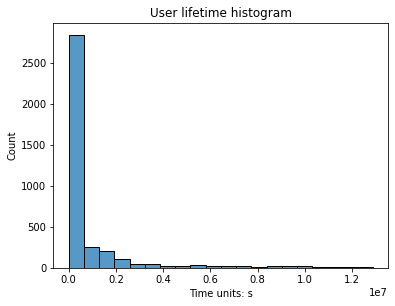

In [23]:
stream.user_lifetime_hist();

#### Timedelta between two events


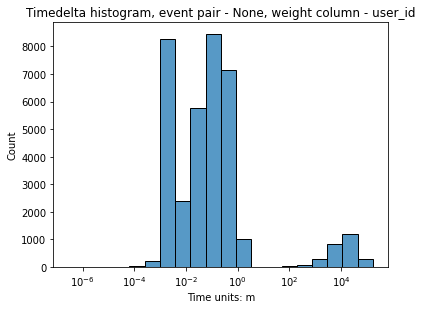

In [24]:
stream.timedelta_hist(log_scale=True, timedelta_unit='m');

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/data_processors_lib/split_sessions.py:318: FutureWarning: The provided callable <function cumsum at 0x10d501620> is currently using SeriesGroupBy.cumsum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "cumsum" instead.
  df[session_col] = df.groupby(user_col)[self.IS_SESSION_START_COL].transform(np.cumsum)


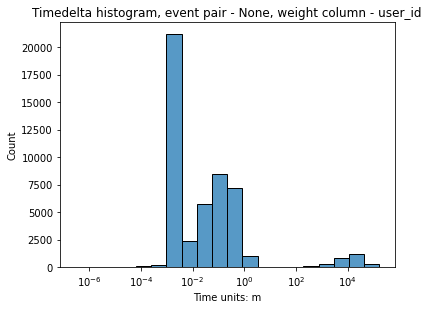

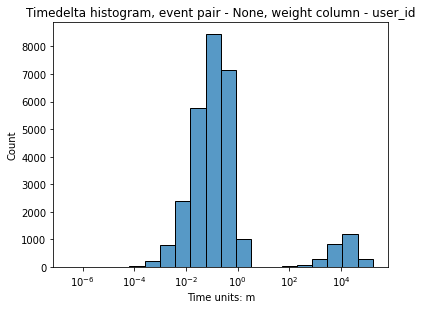

In [25]:
stream_with_synthetic = datasets\
    .load_simple_shop()\
    .add_start_end_events()\
    .split_sessions(timeout=(30, 'm'))

stream_with_synthetic.timedelta_hist(log_scale=True, timedelta_unit='m')
stream_with_synthetic.timedelta_hist(
    raw_events_only=True,
    log_scale=True,
    timedelta_unit='m'
);

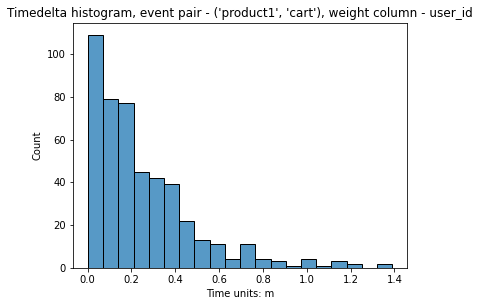

In [26]:
stream.timedelta_hist(event_pair=('product1', 'cart'), timedelta_unit='m');

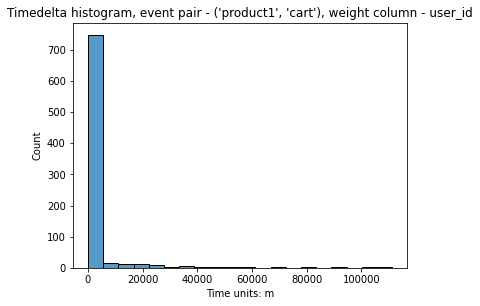

In [27]:
stream.timedelta_hist(
    event_pair=('product1', 'cart'),
    timedelta_unit='m',
    adjacent_events_only=False
);

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/tooling/timedelta_hist/timedelta_hist.py:109: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx &= series >= series.quantile(self.lower_cutoff_quantile)


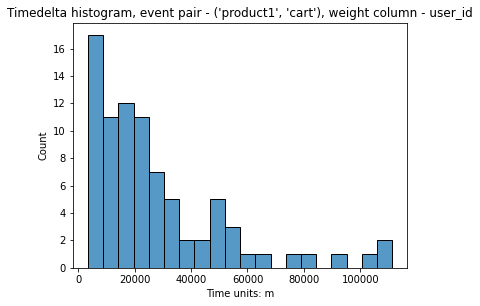

In [28]:
stream.timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        lower_cutoff_quantile=0.9
    );

/Users/v.kukushkin/rete/retentioneering-tools-new-arch/retentioneering/tooling/timedelta_hist/timedelta_hist.py:107: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  idx &= series <= series.quantile(self.upper_cutoff_quantile)


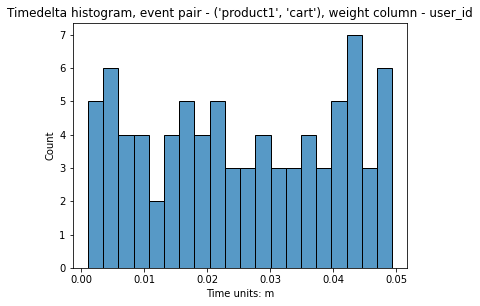

In [29]:
stream.timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        upper_cutoff_quantile=0.1
    );

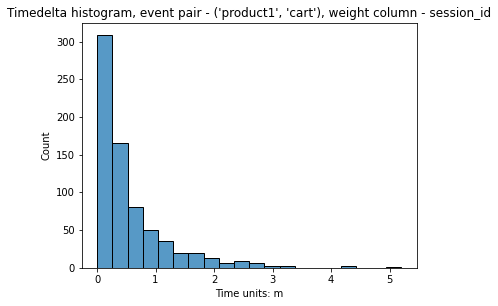

In [30]:
stream_with_synthetic\
    .timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        weight_col='session_id'
    );

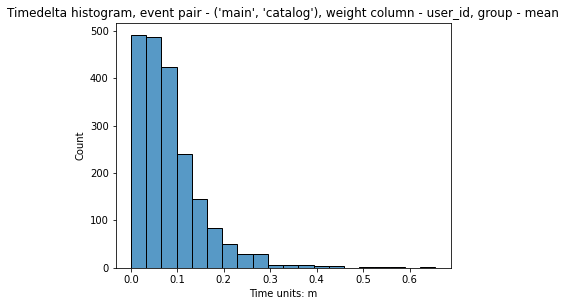

In [31]:
stream\
    .timedelta_hist(
        event_pair=('main', 'catalog'),
        timedelta_unit='m',
        adjacent_events_only=False,
        weight_col='user_id',
        time_agg='mean'
    );

#### Eventstream global events


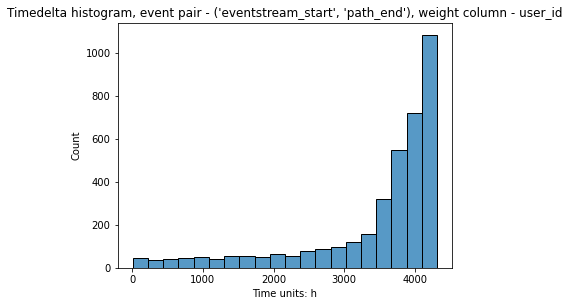

In [32]:
stream_with_synthetic\
    .timedelta_hist(
        event_pair=('eventstream_start', 'path_end'),
        timedelta_unit='h',
        adjacent_events_only=False
    );

### Events intensity

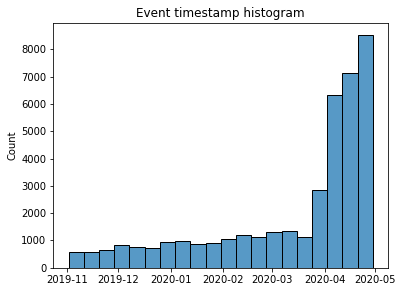

In [33]:
stream.event_timestamp_hist();

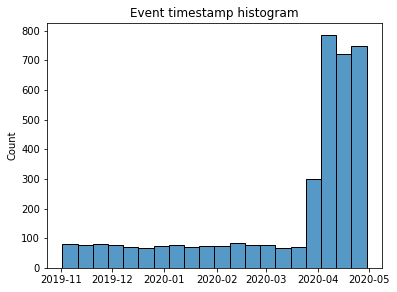

In [34]:
stream\
    .add_start_end_events()\
    .event_timestamp_hist(event_list=['path_start']);

## Path metrics

In [35]:
metrics = [
    ('len', 'path_length'),
    ('has:cart', 'has_cart'),
    ('time_to:cart', 'time_to_cart'),
    (lambda _df: (_df['event'] == 'cart').sum(), 'cart_count'),
    (pd.NamedAgg('timestamp', lambda s: len(s.dt.date.unique())), 'active_days')
]

stream.path_metrics(metrics)

path_length  has_cart            time_to_cart  cart_count  \
122915              34      True  6 days 01:22:39.090422           1   
463458              12     False                     NaT           0   
1475907             16      True 23 days 13:03:45.213509           1   
1576626              3     False                     NaT           0   
2112338              7     False                     NaT           0   
...                ...       ...                     ...         ...   
999275109            7      True  0 days 00:00:08.921585           1   
999642905           10      True  0 days 00:00:41.320856           1   
999914554           19      True  0 days 00:02:58.003009           1   
999916163            6      True  0 days 00:00:08.274196           2   
999941967            3     False                     NaT           0   

           active_days  
122915               2  
463458               1  
1475907              2  
1576626              1  
2112338              1  
...                ...  
999275109            1  
999642905            1  
999914554            1  
999916163            1  
999941967            1  

[3751 rows x 5 columns]